# Install required libraries

In [1]:
# install.packages("ggplot2")
# install.packages("magrittr")
# install.packages("caret")
# install.packages("keras")
# install.packages("tensorflow")
# install.packages("cluster.stats")

# Import libraries

In [2]:
library(ggcorrplot)
library(dplyr)
library(corrr)
library(caret)
library(lubridate)
library(corrplot)
library(lubridate)
library(ggplot2)
library(magrittr)

library(e1071)  # For SVM
library(rpart)  # For Decision Tree
library(keras)
library(tensorflow)
library(cluster)
# library(cluster.stats)
library(pROC)

Loading required package: ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


corrplot 0.92 loaded


Attaching package: ‘tensorflow’


The following object is masked from ‘package:caret’:

    train


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




## Part 1: Classification

# A. Feature Engineering

# Part (1) A -1

# Read Data from CSV file

In [3]:
file_path <- "/kaggle/input/classification-dataset/MedicalCentre.csv"
medicalcentre_data <- read.csv(file_path)

In [4]:
head(medicalcentre_data, n = 10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No.show
,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,2.98725e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2,5.58998e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
3,4.26296e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,8.67951e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5,8.84119e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
6,9.59851e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
7,7.33688e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
8,3.44983e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
9,5.63947e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No


# Show column Data types

In [5]:
column_DataTypes <- sapply(medicalcentre_data, class)
column_DataTypes


PatientId  AppointmentID         Gender   ScheduledDay AppointmentDay 
     "numeric"      "integer"    "character"    "character"    "character" 
           Age  Neighbourhood    Scholarship   Hipertension       Diabetes 
     "integer"    "character"      "integer"      "integer"      "integer" 
    Alcoholism        Handcap   SMS_received        No.show 
     "integer"      "integer"      "integer"    "character"

# Show some Info about Data

In [6]:
str(medicalcentre_data)

'data.frame':	110527 obs. of  14 variables:
 $ PatientId     : num  2.99e+13 5.59e+14 4.26e+12 8.68e+11 8.84e+12 ...
 $ AppointmentID : int  5642903 5642503 5642549 5642828 5642494 5626772 5630279 5630575 5638447 5629123 ...
 $ Gender        : chr  "F" "M" "F" "F" ...
 $ ScheduledDay  : chr  "2016-04-29T18:38:08Z" "2016-04-29T16:08:27Z" "2016-04-29T16:19:04Z" "2016-04-29T17:29:31Z" ...
 $ AppointmentDay: chr  "2016-04-29T00:00:00Z" "2016-04-29T00:00:00Z" "2016-04-29T00:00:00Z" "2016-04-29T00:00:00Z" ...
 $ Age           : int  62 56 62 8 56 76 23 39 21 19 ...
 $ Neighbourhood : chr  "JARDIM DA PENHA" "JARDIM DA PENHA" "MATA DA PRAIA" "PONTAL DE CAMBURI" ...
 $ Scholarship   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Hipertension  : int  1 0 0 0 1 1 0 0 0 0 ...
 $ Diabetes      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Alcoholism    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Handcap       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SMS_received  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ No.show       : chr  "No" "No" "No" "No" ..

# Show Row Count 

In [7]:
rows_count <- nrow(medicalcentre_data)
rows_count

[1] 110527

# Count missing values for each column

In [8]:
missing_Values_count <- colSums(is.na(medicalcentre_data))
missing_Values_count

PatientId  AppointmentID         Gender   ScheduledDay AppointmentDay 
             0              0              0              0              0 
           Age  Neighbourhood    Scholarship   Hipertension       Diabetes 
             3              0              0              0              0 
    Alcoholism        Handcap   SMS_received        No.show 
             0              0              0              0

# Drop all Rows that contain NULL values

In [9]:
medicalcentre_data <- na.omit(medicalcentre_data)

# Check duplicate

In [10]:
duplicate_count <- sum(duplicated(medicalcentre_data))
duplicate_count

[1] 0

# Show unique values in No.show column

In [11]:
value_counts_NoShow <- table(medicalcentre_data$No.show)
value_counts_NoShow


   No   Yes 
88205 22319 

# Part (1) A -2

# Draw Box plot for numeric features  and bar chart for categorical features

In [12]:

plot_all_feature <- function(data){

numeric_data <- data[, c("AppointmentID", "Age","PatientId")]

for (col in names(numeric_data)) {
  boxplot(numeric_data[[col]], main = paste("Boxplot of", col), col = "skyblue", ylab = col, border = "darkblue", boxwex = 0.5, staplewex = 0.5, outwex = 0.5)
}
Categ_data <- data[, c("Gender", "Neighbourhood","Scholarship","Hipertension","Diabetes","Alcoholism",
                       "Handcap","SMS_received","ScheduledDay","No.show")]

for (col in names(Categ_data)) {

    barplot(table(data[[col]]), main =  paste("Barplot of", col), xlab = col, ylab = "Frequency",
            col = "skyblue", border = "darkblue", cex.names = 1.5)
}
}

# Run plot_all_feature function to Display plots for All feature in Medical Centre Data

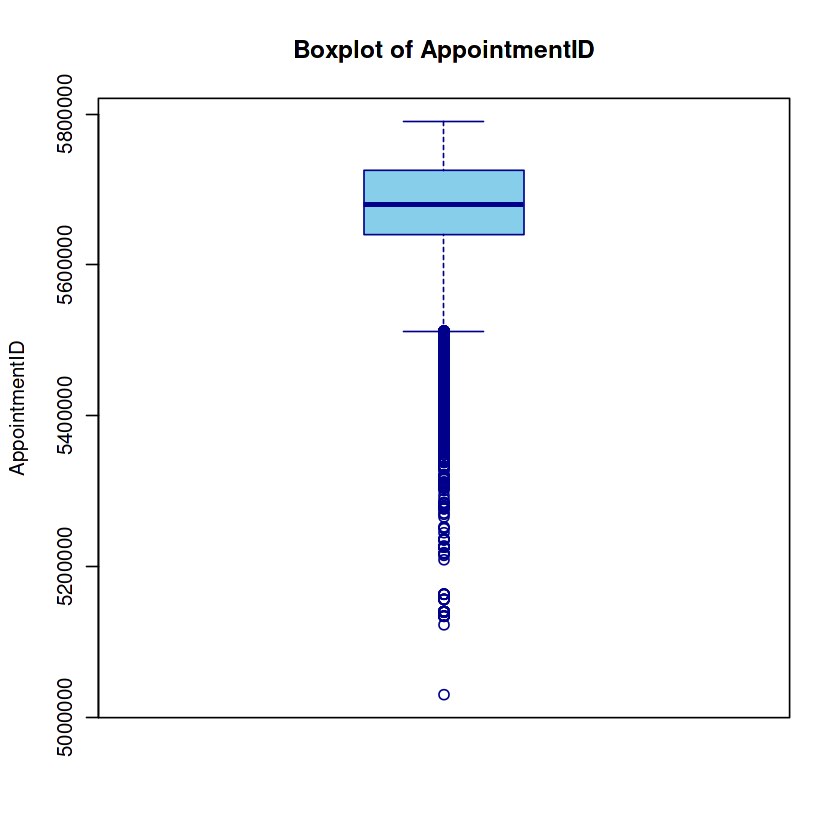

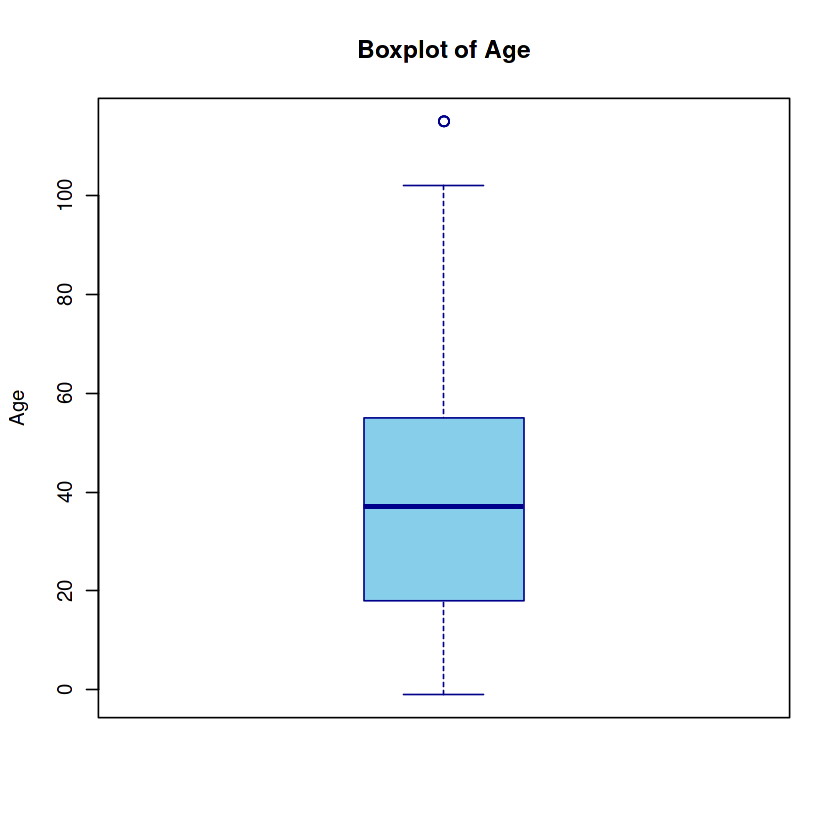

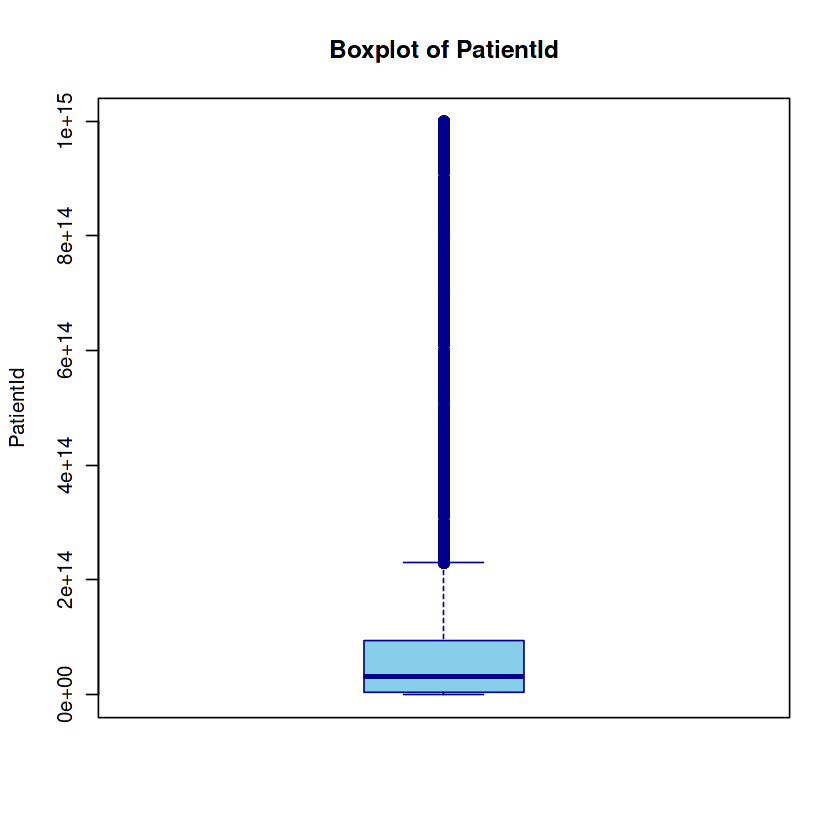

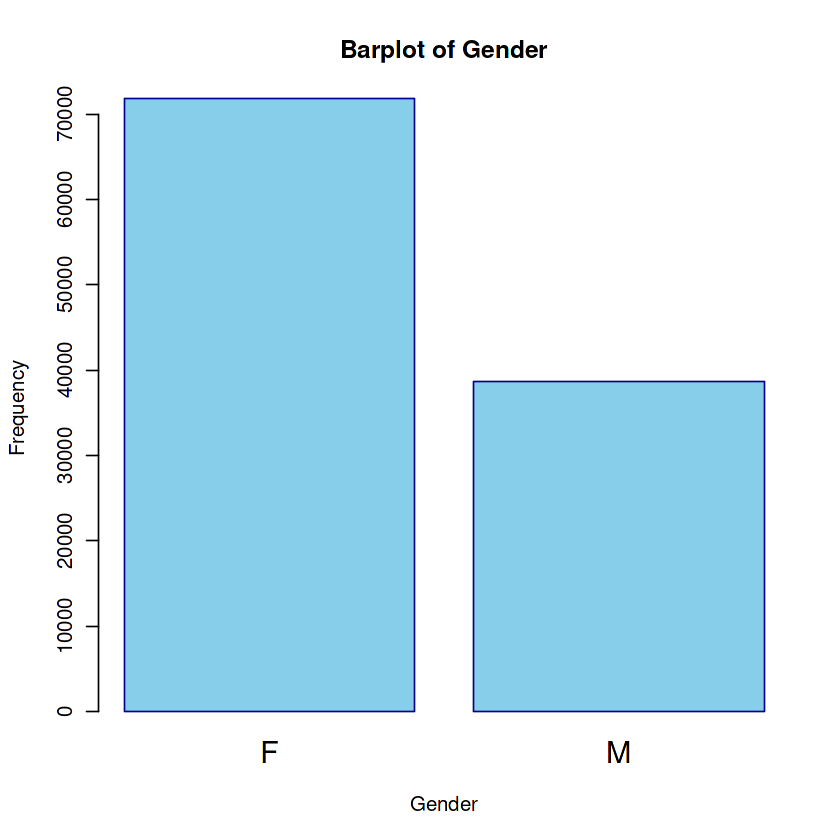

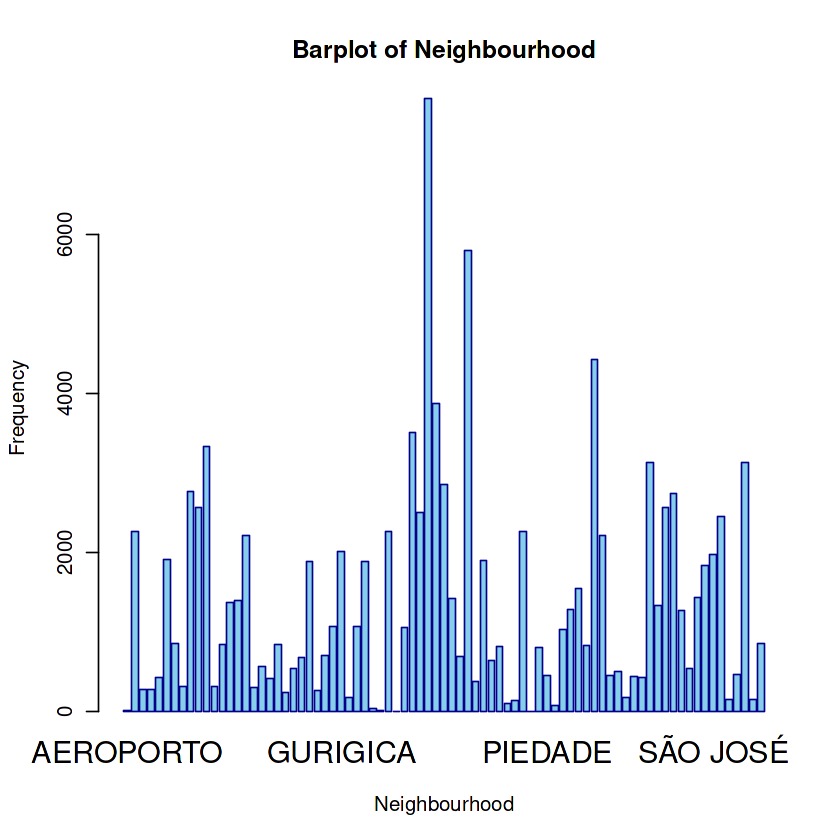

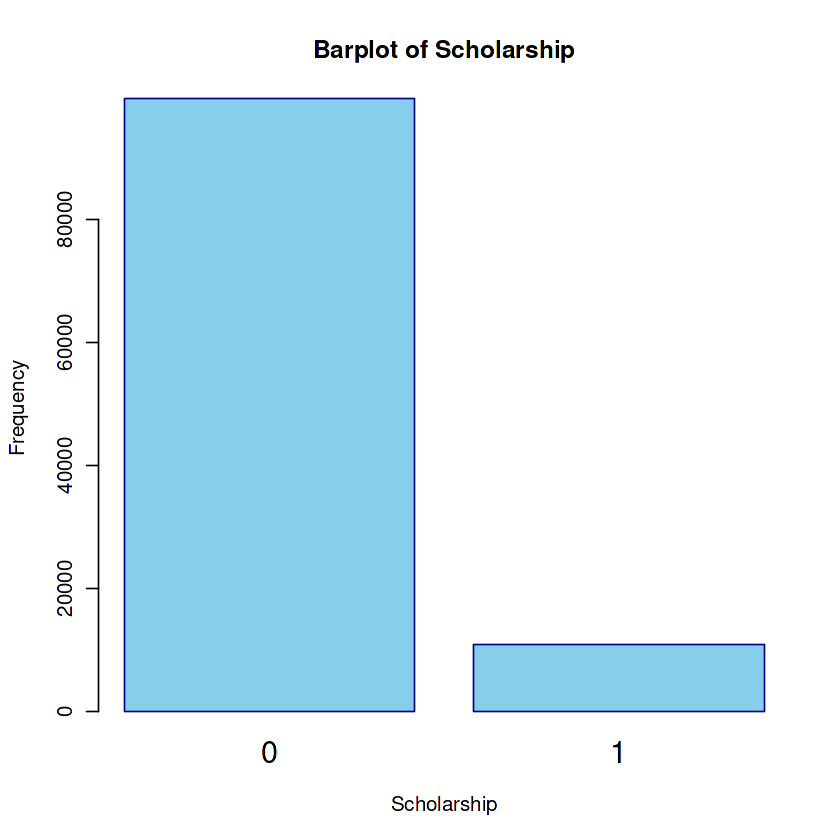

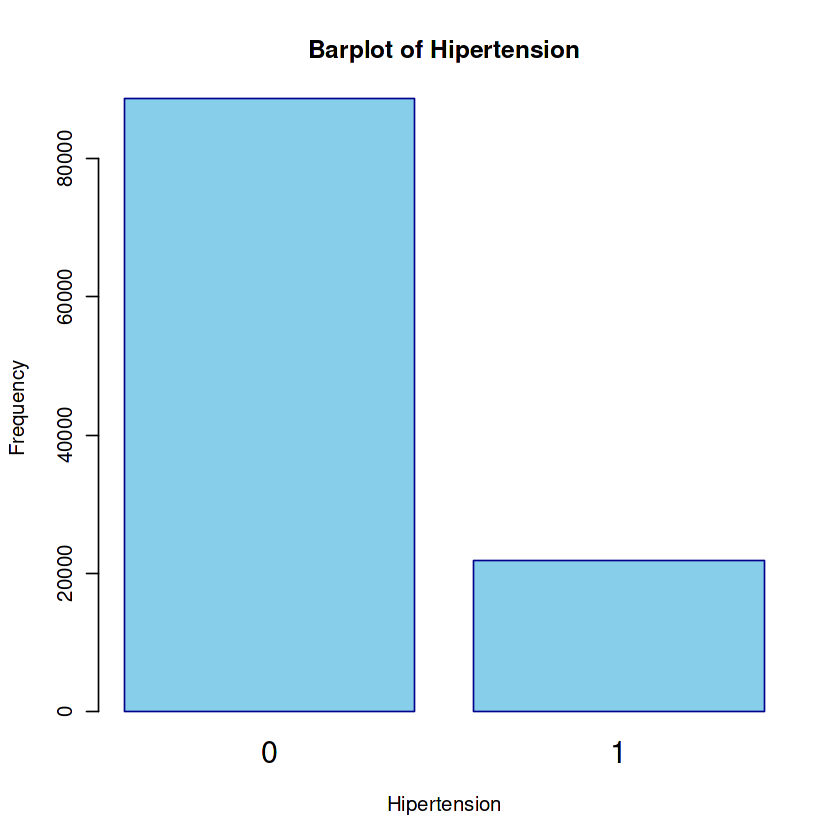

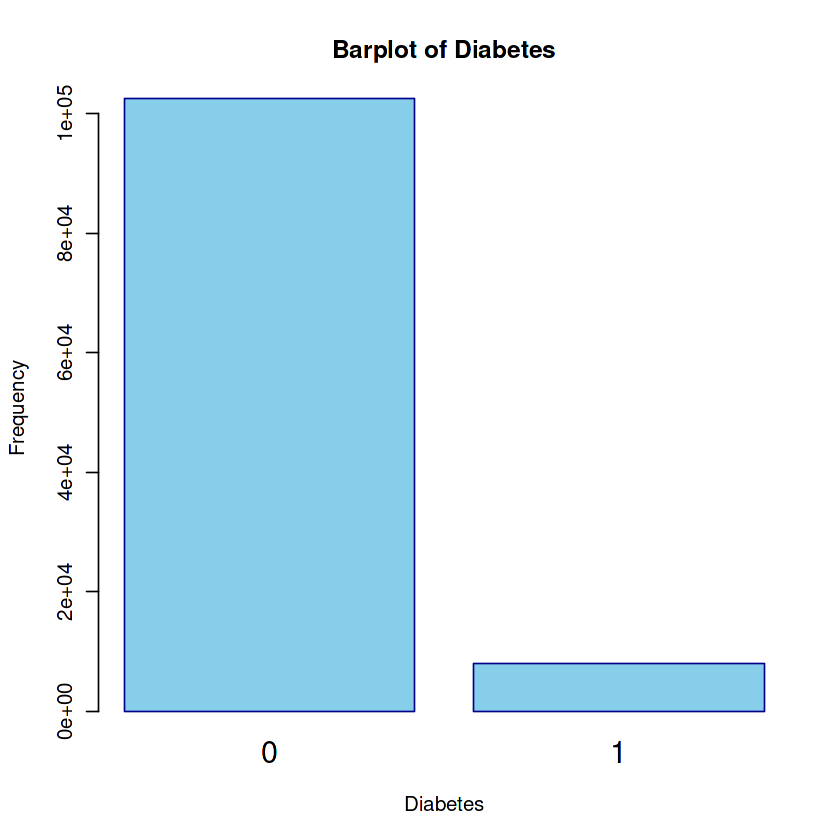

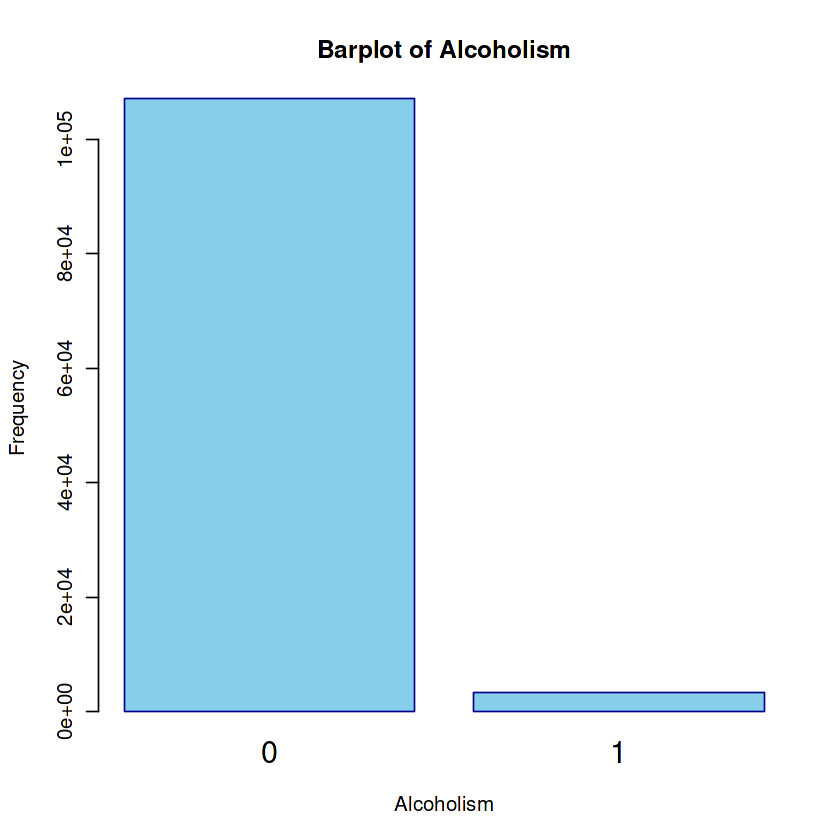

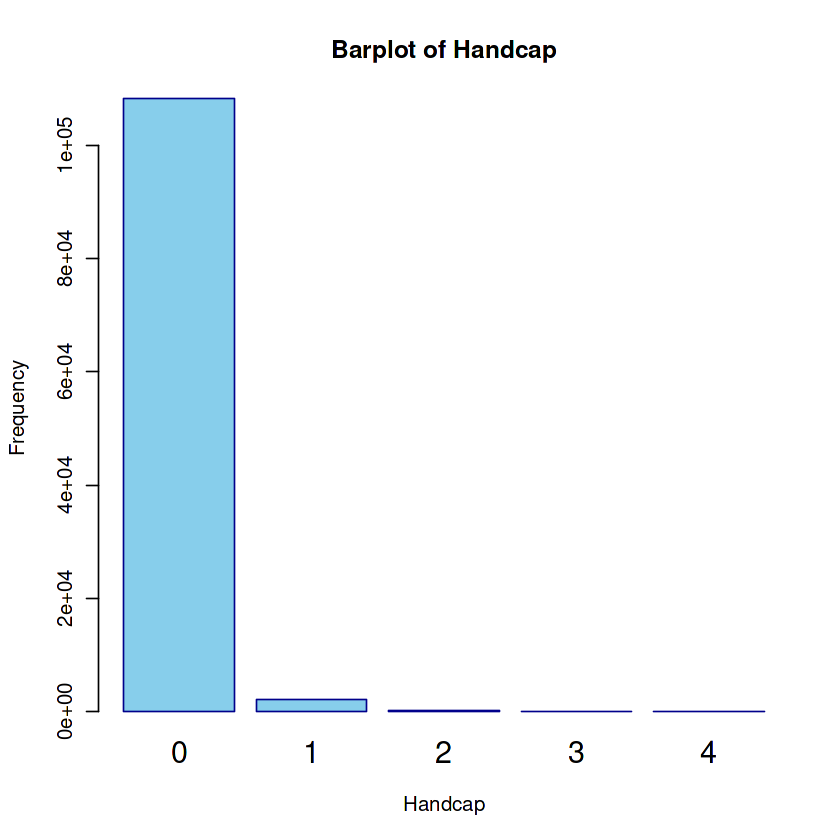

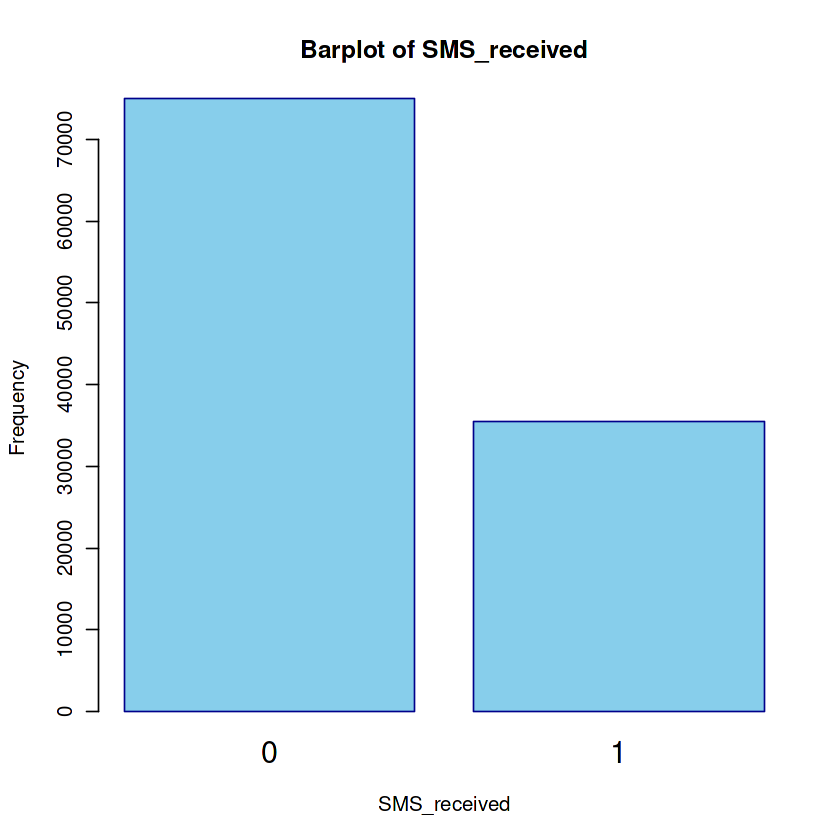

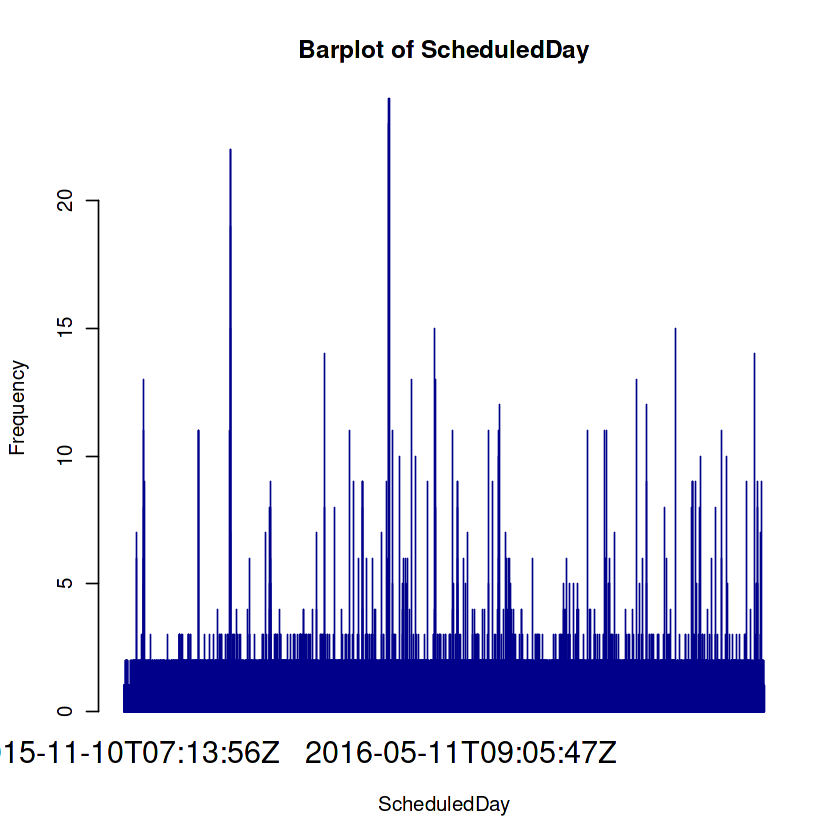

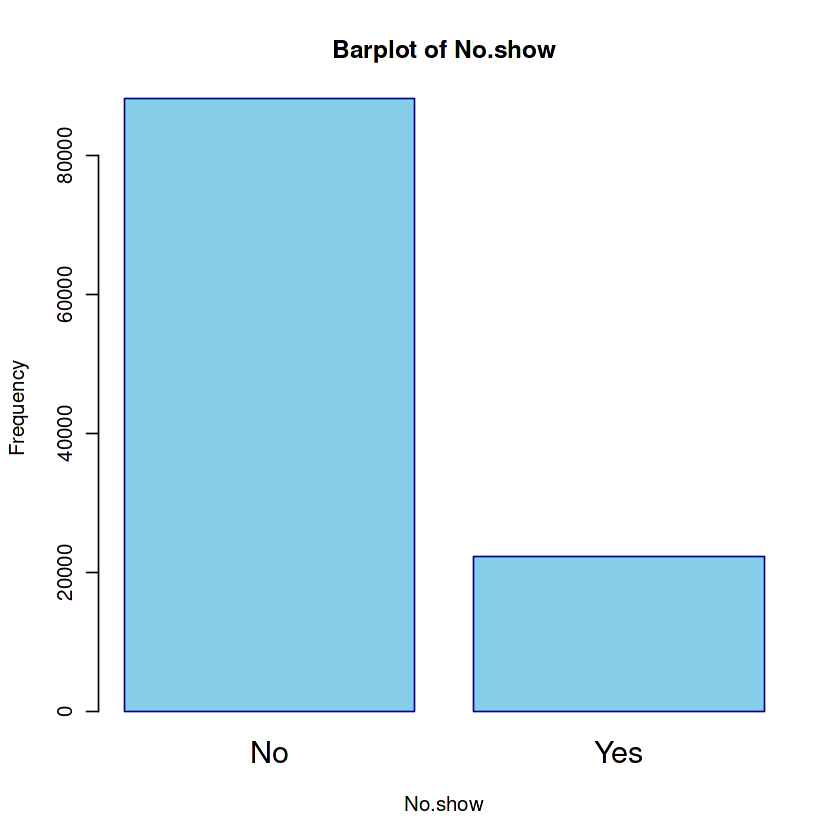

In [13]:
plot_all_feature(medicalcentre_data)


# Part (1) A- 3

# Count the frequency of negative Age feature

In [14]:
negative_age_frequency <- table(medicalcentre_data$Age < 0)["TRUE"]
negative_age_frequency


TRUE 
   1

# Drop negative Age

In [15]:

medicalcentre_data <- medicalcentre_data[medicalcentre_data$Age >= 0, ]

# Part (1) A- 4

# Calculate the waiting time between 'AppointmentDay' and 'ScheduledDay'
# then transform them into positive values

In [16]:
medicalcentre_data$AppointmentDay <- as.Date(medicalcentre_data$AppointmentDay)
medicalcentre_data$ScheduledDay <- as.Date(medicalcentre_data$ScheduledDay)
medicalcentre_data$WaitingTime <- as.numeric(medicalcentre_data$AppointmentDay - medicalcentre_data$ScheduledDay)
medicalcentre_data$WaitingTime <- abs(medicalcentre_data$WaitingTime)

In [17]:
head(medicalcentre_data,10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No.show,WaitingTime
,<dbl>,<int>,<chr>,<date>,<date>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
1,2.98725e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
2,5.58998e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
3,4.26296e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
4,8.67951e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
5,8.84119e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
6,9.59851e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2
7,7.33688e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
8,3.44983e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
9,5.63947e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0


# Part (1) A- 5

# Encode the string categorical values into an integer code

In [18]:
medicalcentre_data$Neighbourhood <- as.integer(factor(medicalcentre_data$Neighbourhood))
medicalcentre_data$Gender <- as.integer(factor(medicalcentre_data$Gender))
medicalcentre_data$`No.show` <- as.integer(factor(medicalcentre_data$`No.show`))

# Show unique values in Neighbourhood column  after Encoding

In [19]:
value_counts <- table(medicalcentre_data$Neighbourhood)
value_counts



   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   8 2262  271  282  423 1907  858  312 2773 2565 3334  310  849 1376 1398 2217 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 305  560  413  849  235  538  682 1889  258  700 1071 2018  175 1071 1885   35 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
  10 2266    2 1057 3514 2508 7717 3877 2853 1427  694 5805  371 1902  644  824 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
  96  135 2263    1  802  452   69 1035 1288 1553  835 4431 2214  448  506  178 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
 438  428 3130 1332 2571 2746 1276  547 1439 1836 1977 2448  145  469 3132  152 
  81 
 851 

# Show unique values in No.show column  after Encoding

In [20]:
value_counts <- table(medicalcentre_data$`No.show`)
value_counts



    1     2 
88204 22319 

In [21]:
head(medicalcentre_data, n = 5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No.show,WaitingTime
,<dbl>,<int>,<int>,<date>,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,2.98725e+13,5642903,1,2016-04-29,2016-04-29,62,40,0,1,0,0,0,0,1,0
2,5.58998e+14,5642503,2,2016-04-29,2016-04-29,56,40,0,0,0,0,0,0,1,0
3,4.26296e+12,5642549,1,2016-04-29,2016-04-29,62,47,0,0,0,0,0,0,1,0
4,8.67951e+11,5642828,1,2016-04-29,2016-04-29,8,55,0,0,0,0,0,0,1,0
5,8.84119e+12,5642494,1,2016-04-29,2016-04-29,56,40,0,1,1,0,0,0,1,0


# Part (1) A- 6

# Separate the date features into date components 'AppointmentDay' and 'ScheduledDay'


In [22]:
medicalcentre_data$ScheduledDay_Year <- year(medicalcentre_data$ScheduledDay)
medicalcentre_data$ScheduledDay_Month <- month(medicalcentre_data$ScheduledDay)
medicalcentre_data$ScheduledDay_Day <- day(medicalcentre_data$ScheduledDay)

In [23]:
medicalcentre_data$AppointmentDay_Year <- year(medicalcentre_data$AppointmentDay)
medicalcentre_data$AppointmentDay_Month <- month(medicalcentre_data$AppointmentDay)
medicalcentre_data$AppointmentDay_Day <- day(medicalcentre_data$AppointmentDay)

# Drop "AppointmentDay" and "ScheduledDay"  after Separating into date components

In [24]:
medicalcentre_data <- medicalcentre_data[, !(names(medicalcentre_data) %in% c("AppointmentDay","ScheduledDay"))]

In [25]:
head(medicalcentre_data,5)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No.show,WaitingTime,ScheduledDay_Year,ScheduledDay_Month,ScheduledDay_Day,AppointmentDay_Year,AppointmentDay_Month,AppointmentDay_Day
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,2.98725e+13,5642903,1,62,40,0,1,0,0,0,0,1,0,2016,4,29,2016,4,29
2,5.58998e+14,5642503,2,56,40,0,0,0,0,0,0,1,0,2016,4,29,2016,4,29
3,4.26296e+12,5642549,1,62,47,0,0,0,0,0,0,1,0,2016,4,29,2016,4,29
4,8.67951e+11,5642828,1,8,55,0,0,0,0,0,0,1,0,2016,4,29,2016,4,29
5,8.84119e+12,5642494,1,56,40,0,1,1,0,0,0,1,0,2016,4,29,2016,4,29


# Part (1) A- 7

# Function "Data_scaled"
* this is user defined function whice scale the data 

* It Takes 1 parameters Column

* then calculate min_Column and max_Column then apply this equation  newX=(X- Min)/(Max - Min)

In [26]:
Data_scaled <- function(Column) {
  min_Column <- min(Column)
  max_Column <- max(Column)
  Column_scaled <- (Column - min_Column) / (max_Column - min_Column)
  return(Column_scaled)
}

# Run "Data_scaled" Function using Age Column 

In [27]:
medicalcentre_data$Age <- Data_scaled(medicalcentre_data$Age)

In [28]:
head (medicalcentre_data,5)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No.show,WaitingTime,ScheduledDay_Year,ScheduledDay_Month,ScheduledDay_Day,AppointmentDay_Year,AppointmentDay_Month,AppointmentDay_Day
,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,2.98725e+13,5642903,1,0.53913043,40,0,1,0,0,0,0,1,0,2016,4,29,2016,4,29
2,5.58998e+14,5642503,2,0.48695652,40,0,0,0,0,0,0,1,0,2016,4,29,2016,4,29
3,4.26296e+12,5642549,1,0.53913043,47,0,0,0,0,0,0,1,0,2016,4,29,2016,4,29
4,8.67951e+11,5642828,1,0.06956522,55,0,0,0,0,0,0,1,0,2016,4,29,2016,4,29
5,8.84119e+12,5642494,1,0.48695652,40,0,1,1,0,0,0,1,0,2016,4,29,2016,4,29


# Part (1) A-8

# Conduct variability comparison between features using a correlation matrix

In [29]:
correlation_heatmap <- function(data) {
  # Check for zero standard deviations
  zero_sd_columns <- sapply(data, function(x) sd(x) == 0)
  zero_sd_columns <- names(zero_sd_columns)[zero_sd_columns]
  
  if (length(zero_sd_columns) > 0) {
    warning(paste("Column(s) with zero standard deviation:", paste(zero_sd_columns, collapse = ", ")))
    data <- data[, !names(data) %in% zero_sd_columns]
  }
  
  correlation_matrix <- cor(data)
  
  
  correlation_df <- reshape2::melt(correlation_matrix)
  
  options(repr.plot.width = 20, repr.plot.height = 20)
  
  ggplot(correlation_df, aes(Var2, Var1, fill = value)) +
    geom_tile() +
    geom_text(aes(label = round(value, 2)), color = "black", size = 5) +
    scale_fill_gradient2(low = "#F44336", high = "#4CAF50", mid = "white",
                         midpoint = 0, limit = c(-1, 1),
                         name = "Correlation") +
    theme_minimal() +
    labs(x = "", y = "",
         title = "Correlation Heatmap") +
    theme(plot.title = element_text(size = 16, face = "bold"),
          axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 15),
          axis.text.y = element_text(size = 15),
          axis.title = element_blank(),
          legend.position = "right",
          legend.title = element_text(size = 12, face = "bold"),
          legend.text = element_text(size = 10),
          plot.background = element_rect(fill = "white")) +
    coord_equal(ratio = 0.5)+
    theme(plot.background = element_rect(fill = "white"),
          panel.grid = element_blank(),
          panel.border = element_blank(),
          panel.background = element_rect(fill = "white"),
          panel.spacing = unit(20, "mm")) +
    theme(plot.background = element_rect(fill = "white"))
}

Warning message in correlation_heatmap(medicalcentre_data):
“Column(s) with zero standard deviation: AppointmentDay_Year”


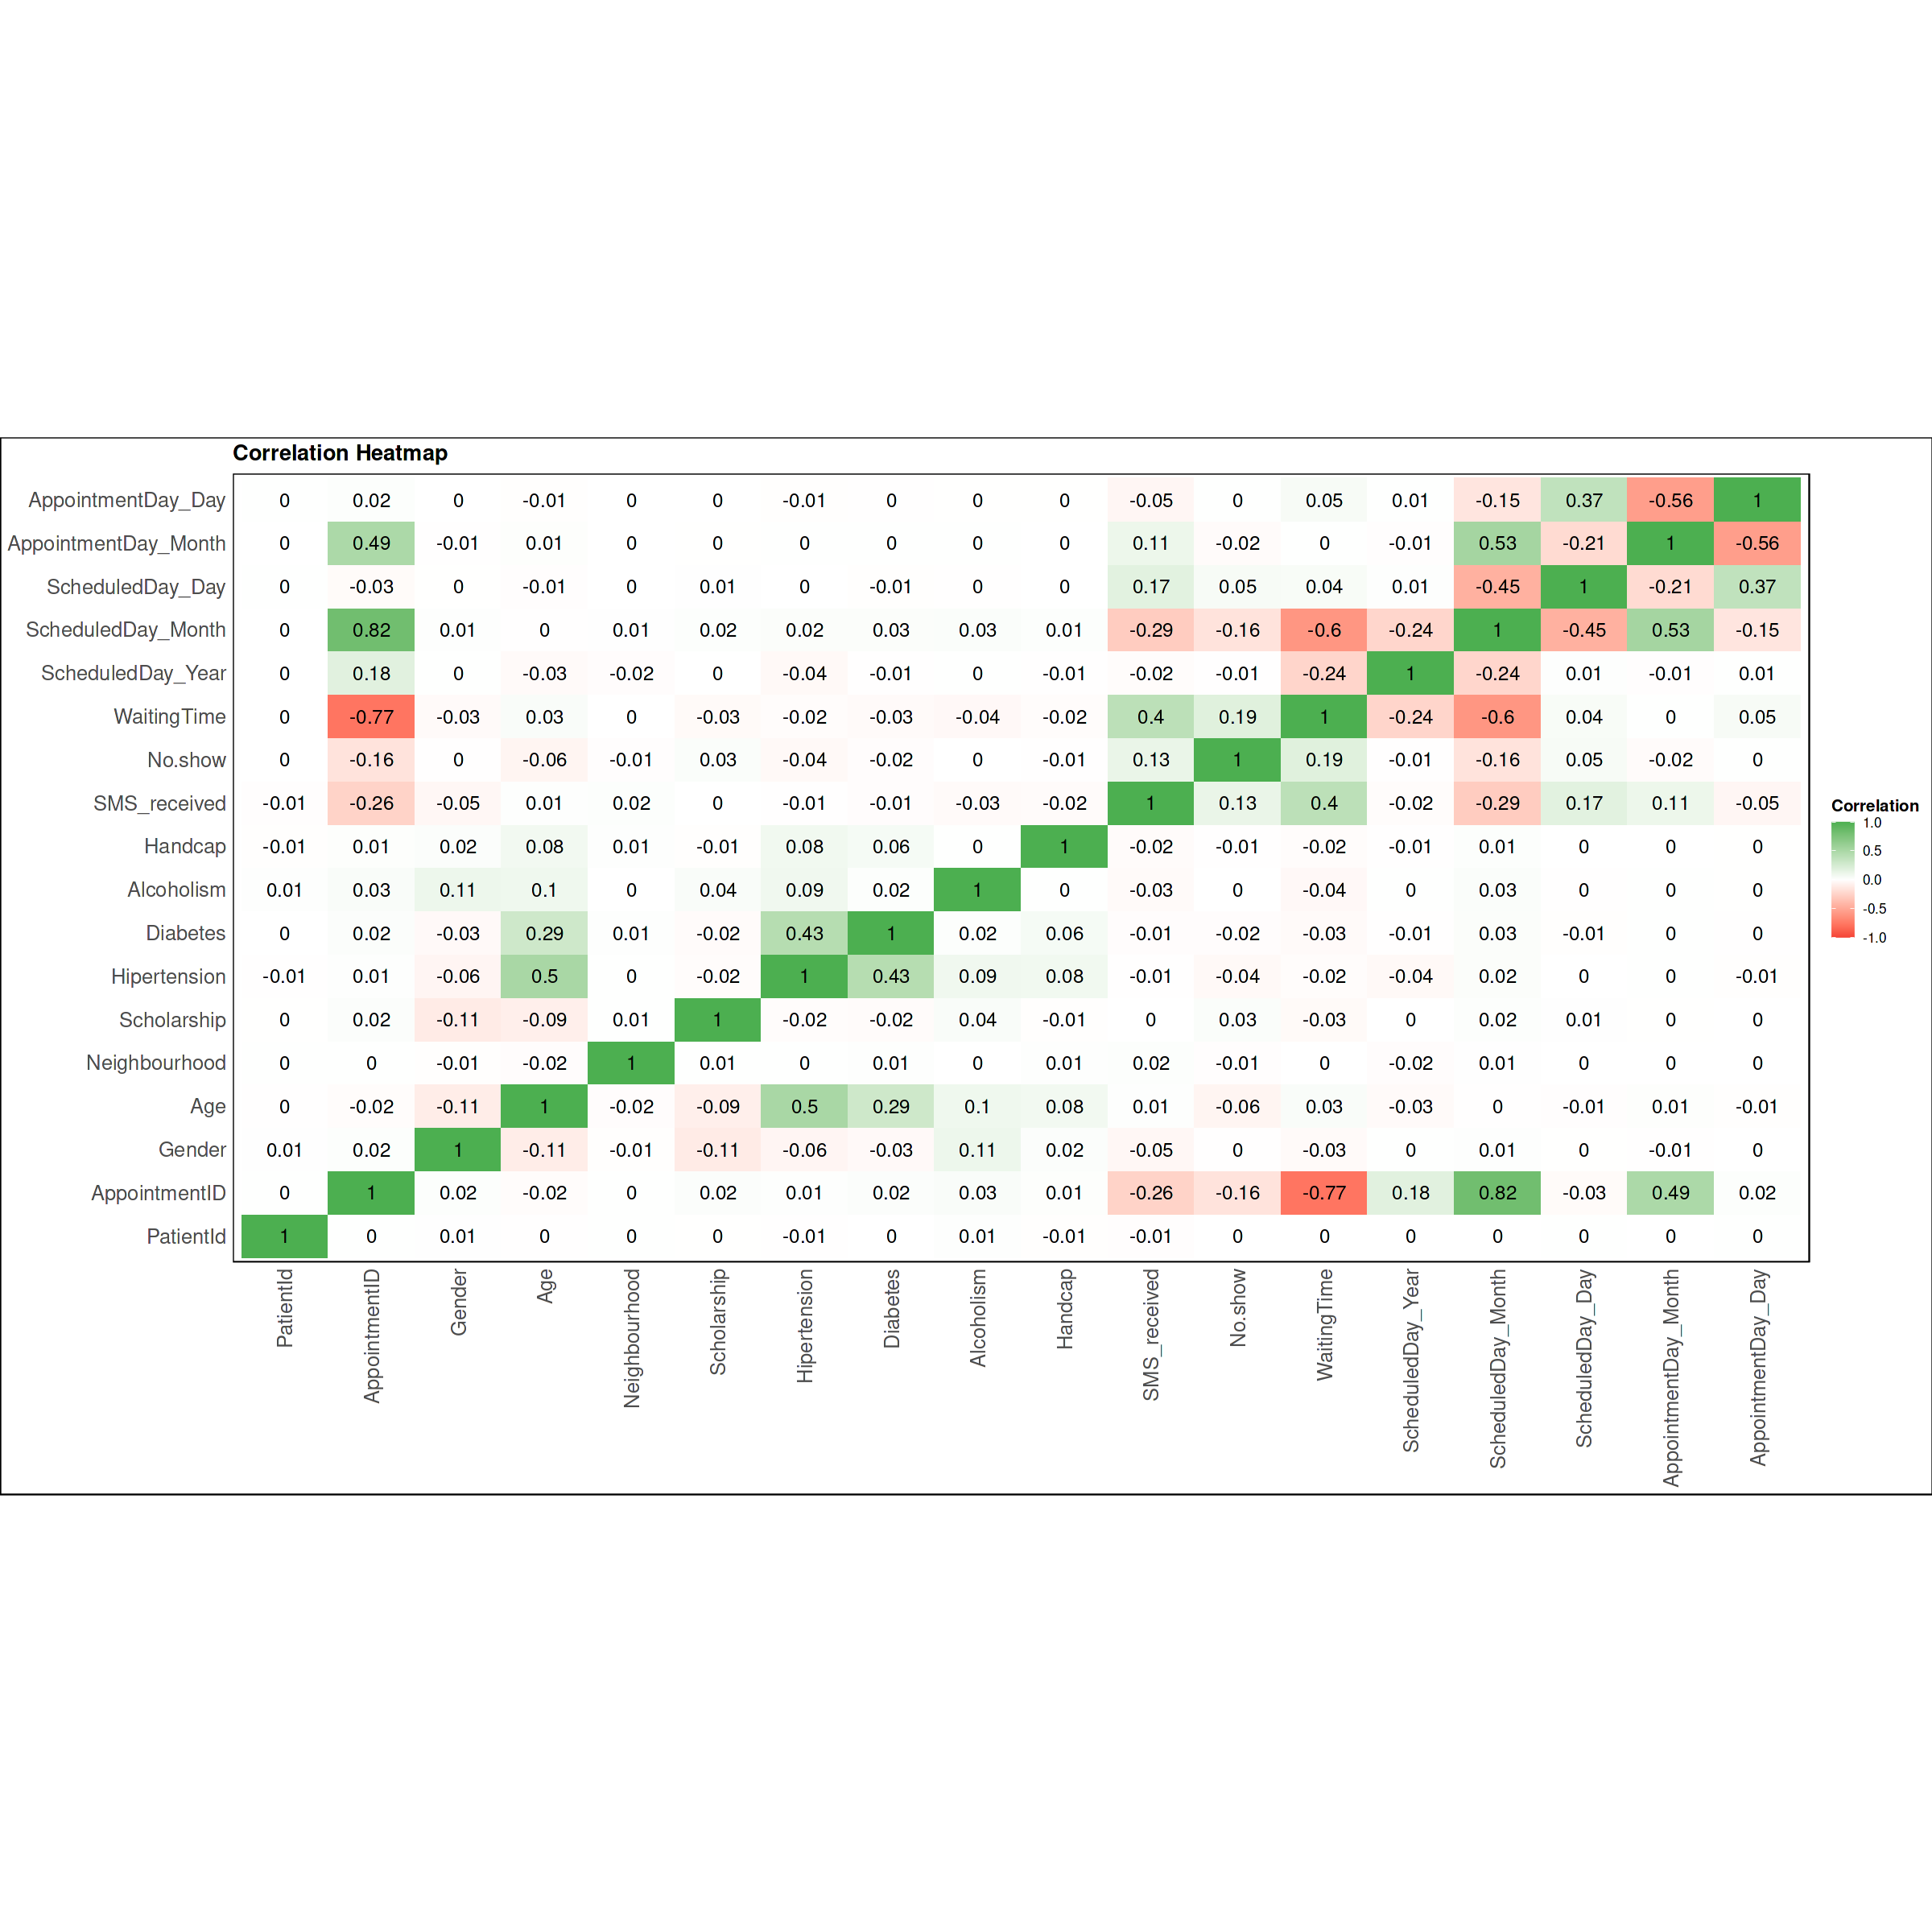

In [30]:
correlation_heatmap(medicalcentre_data)

# Drop correlated features that higher than 0.5 

In [31]:
medicalcentre_data <- medicalcentre_data[, !(names(medicalcentre_data) %in% c("PatientId","AppointmentID",
                                                                              "ScheduledDay_Month", 
                                        "AppointmentDay_Month", "ScheduledDay_Year","AppointmentDay_Year",
                                    "AppointmentDay_Day","WaitingTime"))]

# Convert categorical from integer to factor

In [32]:
medicalcentre_data$No.show <- as.factor(medicalcentre_data$No.show)
medicalcentre_data$Neighbourhood <- as.factor(medicalcentre_data$Neighbourhood)
medicalcentre_data$Gender <- as.factor(medicalcentre_data$Gender)

# Show column Data types

In [33]:
column_types <- sapply(medicalcentre_data, class)
column_types


Gender              Age    Neighbourhood      Scholarship 
        "factor"        "numeric"         "factor"        "integer" 
    Hipertension         Diabetes       Alcoholism          Handcap 
       "integer"        "integer"        "integer"        "integer" 
    SMS_received          No.show ScheduledDay_Day 
       "integer"         "factor"        "integer"

In [34]:
head(medicalcentre_data, n = 5)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No.show,ScheduledDay_Day
,<fct>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>
1,1,0.53913043,40,0,1,0,0,0,0,1,29
2,2,0.48695652,40,0,0,0,0,0,0,1,29
3,1,0.53913043,47,0,0,0,0,0,0,1,29
4,1,0.06956522,55,0,0,0,0,0,0,1,29
5,1,0.48695652,40,0,1,1,0,0,0,1,29


#  Part (1) B 

#  SVM And  Decision Tree

In [35]:
set.seed(123)

# Split the dataset into two parts as training data and test data

In [36]:
train_index <- sample(1:nrow(medicalcentre_data), 0.7 * nrow(medicalcentre_data))
X_train <- medicalcentre_data[train_index, !(names(medicalcentre_data) %in% c("No.show"))]
y_train <- medicalcentre_data[train_index, "No.show"]
X_test <- medicalcentre_data[-train_index, !(names(medicalcentre_data) %in% c("No.show"))]
y_test <- medicalcentre_data[-train_index, "No.show"]


In [37]:


# # Calculate the predicted probabilities
# y_pred_prob <- predict(svm_model, X_test, probability = TRUE)

# Train SVM classifier with radial kernel

In [38]:
svm_classifier <- svm(y_train ~ ., data = X_train, kernel = "radial")

In [39]:
svm_predictions <- predict(svm_classifier, X_test)

# Calculate accuracy for SVM model  

In [40]:
svm_accuracy <- sum(svm_predictions == y_test) / length(y_test)
print(paste("SVM Accuracy:", svm_accuracy))

[1] "SVM Accuracy: 0.797388183490666"


# Calculate Confusion Matrix and Classification Report for SVM model

In [41]:
conf_matrix <- table(y_test, svm_predictions)
class_report <- caret::confusionMatrix(conf_matrix)

print("Confusion Matrix For SVM:")
print(conf_matrix)
print("-------------------------------------")

print("Classification Report For SVM:")
print(class_report)

[1] "Confusion Matrix For SVM:"
      svm_predictions
y_test     1     2
     1 26439     0
     2  6718     0
[1] "-------------------------------------"
[1] "Classification Report For SVM:"
Confusion Matrix and Statistics

      svm_predictions
y_test     1     2
     1 26439     0
     2  6718     0
                                         
               Accuracy : 0.7974         
                 95% CI : (0.793, 0.8017)
    No Information Rate : 1              
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.7974         
            Specificity :     NA         
         Pos Pred Value :     NA         
         Neg Pred Value :     NA         
             Prevalence : 1.0000         
         Detection Rate : 0.7974         
   Detection Prevalence 

# Show count for two classes of y_test

In [42]:
table(y_test)

y_test
    1     2 
26439  6718 

# Show count for two classes of svm_predictions 

In [43]:
table(svm_predictions)

svm_predictions
    1     2 
33157     0 

# Train Decision Tree classifier

In [44]:
Train_Decision_classifier <- rpart(y_train ~ ., data = X_train, method = "class")

In [45]:
DTree_predictions<- predict(Train_Decision_classifier, X_test, type = "class")

## Calculate accuracy for Decision Tree model  

In [46]:
dt_accuracy <- sum(DTree_predictions == y_test) / length(y_test)
print(paste("Decision Tree Accuracy:", dt_accuracy))

[1] "Decision Tree Accuracy: 0.797388183490666"


# Calculate Confusion Matrix and Classification Report for Decision Tree model

In [47]:
conf_matrix <- table(y_test, DTree_predictions)
class_report <- caret::confusionMatrix(conf_matrix)

print("Confusion Matrix For Decision Tree:")
print(conf_matrix)
print("Classification Report For Decision Tree:")
print(class_report)

[1] "Confusion Matrix For Decision Tree:"
      DTree_predictions
y_test     1     2
     1 26439     0
     2  6718     0
[1] "Classification Report For Decision Tree:"
Confusion Matrix and Statistics

      DTree_predictions
y_test     1     2
     1 26439     0
     2  6718     0
                                         
               Accuracy : 0.7974         
                 95% CI : (0.793, 0.8017)
    No Information Rate : 1              
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.7974         
            Specificity :     NA         
         Pos Pred Value :     NA         
         Neg Pred Value :     NA         
             Prevalence : 1.0000         
         Detection Rate : 0.7974         
   Detection Prevalence : 0.7974         
  

# Part (1) C

# Deep Neural Network

# Split the dataset into two parts as training data and test data for Deep Neural Network

In [48]:
train_index <- sample(1:nrow(medicalcentre_data), 0.7 * nrow(medicalcentre_data))
X_train_Neural <- medicalcentre_data[train_index, !(names(medicalcentre_data) %in% c("No.show"))]
y_train_Neural <- medicalcentre_data[train_index, "No.show"]
X_test_Neural <- medicalcentre_data[-train_index, !(names(medicalcentre_data) %in% c("No.show"))]
y_test_Neural <- medicalcentre_data[-train_index, "No.show"]

# show dimensionally for splitted data

In [49]:
dim(X_train_Neural)
dim(y_train_Neural)
dim(X_test_Neural)
dim(y_test_Neural)

[1] 77366    10

NULL

[1] 33157    10

NULL

# Convert X_train And X_test to numeric to path to Deep Neural Network

In [50]:
X_train_Neural <- apply(X_train_Neural, 2, as.numeric)

In [51]:
X_test_Neural <- apply(X_test_Neural, 2, as.numeric)

# Converting the target variable to once hot encoded vectors using keras inbuilt function

In [52]:
y_train_Neural<-to_categorical(y_train_Neural,10)
y_test_Neural<-to_categorical(y_test_Neural,10)

# Defining a keras sequential model

In [53]:
model <- keras_model_sequential()

# Defining the model with dropout rate 0.4 and 1 output layer[10 neurons]


In [54]:

model %>%
  layer_dense(units = 10, input_shape = 10) %>%
  layer_dropout(rate=0.4)%>%
  layer_activation(activation = 'relu') %>%
  layer_dense(units = 10) %>%
  layer_activation(activation = 'softmax')


# Compiling the defined model with metric = accuracy and optimiser as adam.

In [55]:
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = 'adam',
  metrics = c('accuracy')
)


# Fitting the model on the training dataset

In [56]:
model %>% fit(X_train_Neural, y_train_Neural, epochs = 1, batch_size = 128)

# Evaluating model on the cross validation dataset

In [57]:
loss_and_metrics <- model %>% evaluate(X_test_Neural, y_test_Neural, batch_size = 128)
 
loss_and_metrics


loss  accuracy 
0.5398079 0.8001930

# Part (1) D-1

# Function "detect_Model_Accuracy"
* this is user defined function whice Calculate Train and test Accuracy and check overfitting 

* It Takes 5 parameters model, X_train, y_train, X_test, y_test, Model_Name

* then calculate Train and test Accuracy for SVM or Decision Tree, Neural

In [58]:
 detect_Model_Accuracy  <- function(model, X_train, y_train, X_test, y_test,Model_Name) {

if(Model_Name=="Tree"){
    

DTree_predictions_train<- predict(model, X_train, type = "class")
DTree_predictions_test<- predict(model, X_test, type = "class")


 # Calculate the Train and test Accuracy  For Decision Tree
accuracy_train <- sum(DTree_predictions_train == y_train) / length(y_train)
accuracy_test <- sum(DTree_predictions_test == y_test) / length(y_test)

}
 # Calculate the Train and test Accuracy  For Neural
else if(Model_Name=="Neural"){
    loss_and_metrics_Train <- model %>% evaluate(X_train, y_train, batch_size = 128)
 
    accuracy_train=loss_and_metrics_Train[2]
    
    loss_and_metrics_test <- model %>% evaluate(X_test, y_test, batch_size = 128)
 
    accuracy_test=loss_and_metrics_test[2]
}
else if(Model_Name=="SVM"){
  
  y_pred_train_SVM <- predict(model, newdata = X_train)
  y_pred_test_SVM <- predict(model, newdata = X_test)
    
   # Calculate the Train and test Accuracy  For SVM

  accuracy_train <- sum(y_pred_train_SVM == y_train) / length(y_train)
  accuracy_test <- sum(y_pred_test_SVM == y_test) / length(y_test)
}
     
 # Check for overfitting
  overfitting <- ifelse(accuracy_train > accuracy_test, TRUE, FALSE)
  

  return(list(accuracy_train = accuracy_train, accuracy_test = accuracy_test, overfitting = overfitting))
}

# Run "detect_Model_Accuracy" Function using svm_classifier

In [59]:
svm_accuracy_result <- detect_Model_Accuracy(svm_classifier, X_train, y_train, X_test, y_test,"SVM")
print(paste("SVM Classifier Training Accuracy:", svm_accuracy_result$accuracy_train))
print(paste("SVM Classifier Testing Accuracy:", svm_accuracy_result$accuracy_test))
print(paste("Overfitting Detected:", svm_accuracy_result$overfitting))

[1] "SVM Classifier Training Accuracy: 0.798348111573559"
[1] "SVM Classifier Testing Accuracy: 0.797388183490666"
[1] "Overfitting Detected: TRUE"


# Run "detect_Model_Accuracy" Function using Train_Decision_classifier

In [60]:

Decision_Tree_accuracy_result <- detect_Model_Accuracy(Train_Decision_classifier,X_train, y_train, X_test, y_test,"Tree")
print(paste("Decision Tree Classifier Training Accuracy:", Decision_Tree_accuracy_result$accuracy_train))
print(paste("Decision Tree Classifier Testing Accuracy:", Decision_Tree_accuracy_result$accuracy_test))
print(paste("Overfitting Detected:", Decision_Tree_accuracy_result$overfitting))

[1] "Decision Tree Classifier Training Accuracy: 0.798348111573559"
[1] "Decision Tree Classifier Testing Accuracy: 0.797388183490666"
[1] "Overfitting Detected: TRUE"


# Run "detect_Model_Accuracy" Function using Deep_Neural_Network

In [61]:
Deep_Neural_Network_accuracy_result <- detect_Model_Accuracy(model,X_train_Neural, y_train_Neural,
                                                       X_test_Neural, y_test_Neural,"Neural")
print(paste("Deep Neural Network Classifier Training Accuracy:", Deep_Neural_Network_accuracy_result$accuracy_train))
print(paste("Deep Neural Network Testing Accuracy:", Deep_Neural_Network_accuracy_result$accuracy_test))
print(paste("Overfitting Detected:", Deep_Neural_Network_accuracy_result$overfitting))


[1] "Deep Neural Network Classifier Training Accuracy: 0.795543253421783"
[1] "Deep Neural Network Testing Accuracy: 0.800193011760712"
[1] "Overfitting Detected: FALSE"


# Part (1) D-2

# Tuning  [Grid Search]

# Grid Search for Train_Decision

In [62]:
# Define the parameter grid
cp_values <- seq(0.01, 0.1, by = 0.01)
param_grid <- data.frame(cp = cp_values)

# Convert x_train and x_test from matrix to data frame
x_train_df <- as.data.frame(X_train)
x_test_df <- as.data.frame(X_test)

# Train Decision Tree classifier with grid search
results <- lapply(cp_values, function(cp) {
  ctrl <- rpart.control(cp = cp)
  tree_model <- rpart(as.factor(y_train) ~ ., data = x_train_df, control = ctrl)
  tree_pred <- predict(tree_model, newdata = x_test_df, type = "class")
  accuracy <- sum(tree_pred == y_test) / length(y_test) * 100
  return(list(cp = cp, accuracy = accuracy))
})

# Create an empty data frame to store the results
results_df <- data.frame(cp = numeric(length(results)), accuracy = numeric(length(results)))

# Populate the results data frame
for (i in seq_along(results)) {
  results_df[i, "cp"] <- results[[i]]$cp
  results_df[i, "accuracy"] <- results[[i]]$accuracy
}

# Find the best model based on accuracy
best_model <- results_df[which.max(results_df$accuracy), ]

# Print the best model's cp value and accuracy
cat("Best Decision Tree Model (cp =", best_model$cp, ") Accuracy:", round(best_model$accuracy, 2), "%\n")

Best Decision Tree Model (cp = 0.01 ) Accuracy: 79.74 %


# Resample the data to test Grid Search for SVM to make it faster

In [63]:
df_train <- medicalcentre_data %>% sample_frac(0.03, replace = FALSE)
train_index <- sample(1:nrow(df_train), 0.7* nrow(df_train))
X_train_grid <- df_train[train_index, !(names(df_train) %in% c("No.show"))]
y_train_grid <- df_train[train_index, "No.show"]
X_test_grid <- df_train[-train_index, !(names(df_train) %in% c("No.show"))]
y_test_grid <- df_train[-train_index, "No.show"]

# Grid Search for SVM

In [64]:
# Define the parameter grid for the SVM model
parameter_grid <- expand.grid(
  C = c(0.1, 1, 10),
  kernel = c("linear", "radial", "polynomial"),
  degree = c(2, 3, 4),
  gamma = c(0.1, 0.01)
)

 

results <- lapply(1:nrow(parameter_grid), function(i) {
svm_model_tuning <-  svm(
    y_train_grid ~ .,
    data = X_train_grid,
    kernel = parameter_grid$kernel[i],
    degree = parameter_grid$degree[i],
    gamma = parameter_grid$gamma[i],
    cost = parameter_grid$C[i]
  )
   
  predictions <- predict(svm_model_tuning, newdata = X_test_grid)
  accuracy <- sum(predictions == y_test_grid) / nrow(X_test_grid)
 

  list(model = svm_model_tuning, accuracy = accuracy, parameters = parameter_grid[i, ])
})



best_model_index <- which.max(sapply(results, function(x) x$accuracy))
best_model <- results[[best_model_index]]$svm_model_tuning
best_accuracy <- results[[best_model_index]]$accuracy
best_parameters <- results[[best_model_index]]$parameters



print(paste("Best Accuracy for Best parameters for SVM:",best_accuracy))
print(paste("Best C :",best_parameters$C,"-","Best kernel :",best_parameters$kernel,"-",
            "Best Degree :",best_parameters$degree,"-","Best Gamma :",best_parameters$gamma))

[1] "Best Accuracy for Best parameters for SVM: 0.785929648241206"
[1] "Best C : 0.1 - Best kernel : polynomial - Best Degree : 3 - Best Gamma : 0.1"


# Grid Search for Deep Neural Network

In [65]:
X_train_grid <- apply(X_train_grid, 2, as.numeric)
X_test_grid <- apply(X_test_grid, 2, as.numeric)
y_train_grid<-to_categorical(y_train_grid,10)
y_test_grid<-to_categorical(y_test_grid,10)



In [66]:
hyper_grid <- expand.grid(
  batch_size = c(32, 64, 128),
  epochs = c(1,2, 3),
  activation = c("relu", "sigmoid", "tanh"),
  dropout_rate = c(0.2, 0.3, 0.4)
)
oob_err <- c()

for (i in 1:nrow(hyper_grid)) {
  batch_size <- hyper_grid$batch_size[i]
  epochs <- hyper_grid$epochs[i]
  activation <- hyper_grid$activation[i]
  dropout_rate <- hyper_grid$dropout_rate[i]

  model <- keras_model_sequential()
  model %>%
    layer_dense(units = 10, input_shape = 10) %>%
    layer_dropout(rate = dropout_rate) %>%
    layer_activation(activation = activation) %>%
    layer_dense(units = 10) %>%
    layer_activation(activation = 'softmax')

  model %>% compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = c('accuracy')
  )

  history <- model %>% fit(X_train_grid, y_train_grid, epochs = epochs, batch_size = batch_size)
  loss_and_metrics <- model %>% evaluate(X_test_grid, y_test_grid, batch_size = batch_size)
  
  oob_err[i] <- history$metrics$val_loss[length(history$metrics$val_loss)]
}

opt_i <- which.min(oob_err)

Optimal_params <- hyper_grid[opt_i, ]




batch_size <- Optimal_params$batch_size
epochs <- Optimal_params$epochs
activation <- Optimal_params$activation
dropout_rate <- Optimal_params$dropout_rate

cat("Optimal Parameters:\n")
cat("Batch Size:", batch_size, "\n")
cat("Epochs:", epochs, "\n")
cat("Activation:", activation, "\n")
cat("Dropout Rate:", dropout_rate, "\n")

Optimal Parameters:
Batch Size:  
Epochs:  
Activation:  
Dropout Rate:  


# Part (1) D-3

# Evaluate the performance of the SVM, Decision tree and Deep Neural Network classifier

# Calculate the accuracy, sensitivity and specificity of each model

In [67]:
svm_accuracy <- sum(svm_predictions == y_test) / length(y_test)
svm_sensitivity <- sum(svm_predictions == 1 & y_test == 1) / sum(y_test == 1)
svm_specificity <- sum(svm_predictions == 0 & y_test == 0) / sum(y_test == 0)

dt_accuracy <- sum(DTree_predictions == y_test) / length(y_test)
dt_sensitivity <- sum(DTree_predictions == 1 & y_test == 1) / sum(y_test == 1)
dt_specificity <- sum(DTree_predictions == 0 & y_test == 0) / sum(y_test == 0)


cat("Model \t Accuracy \t Sensitivity \t Specificity \n")
cat("SVM\t", svm_accuracy, "\t", svm_sensitivity, "\t", svm_specificity, "\n")
cat("DT\t", dt_accuracy, "\t", dt_sensitivity, "\t", dt_specificity, "\n")

Model 	 Accuracy 	 Sensitivity 	 Specificity 
SVM	 0.7973882 	 1 	 NaN 
DT	 0.7973882 	 1 	 NaN 


# Part (1) D-4


#  The ROC graph of SVM model

Setting levels: control = 1, case = 2

Setting direction: controls < cases



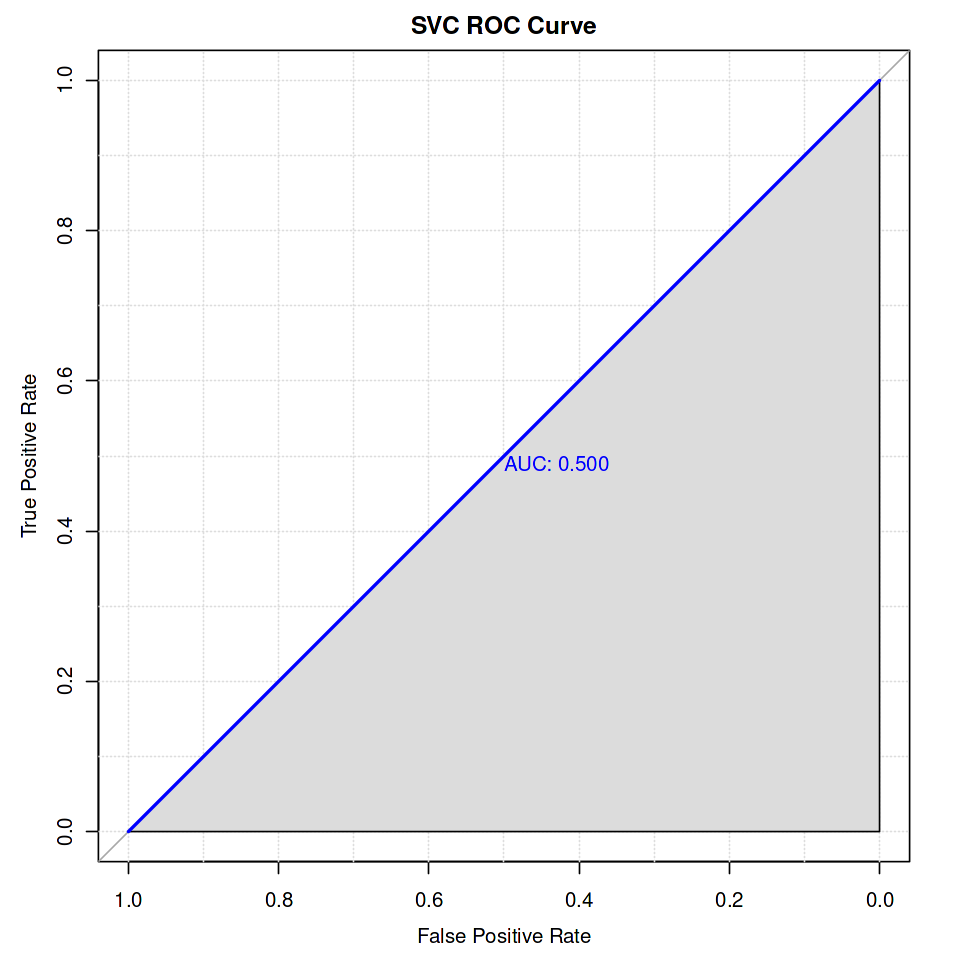

In [68]:
# Set the plot dimensions
options(repr.plot.width = 8, repr.plot.height = 8)  

# Create the ROC curve
svm_predictions <- as.numeric(svm_predictions)

SVM_roc_obj <- roc(y_test, svm_predictions)

plot(SVM_roc_obj, main = "SVC ROC Curve", print.auc = TRUE, auc.polygon = TRUE,
     grid = TRUE, col = "blue", lwd = 2, lty = 1,
    xlab = "False Positive Rate", ylab = "True Positive Rate")

#  The ROC graph of Decision Tree model

Setting levels: control = 1, case = 2

Setting direction: controls < cases



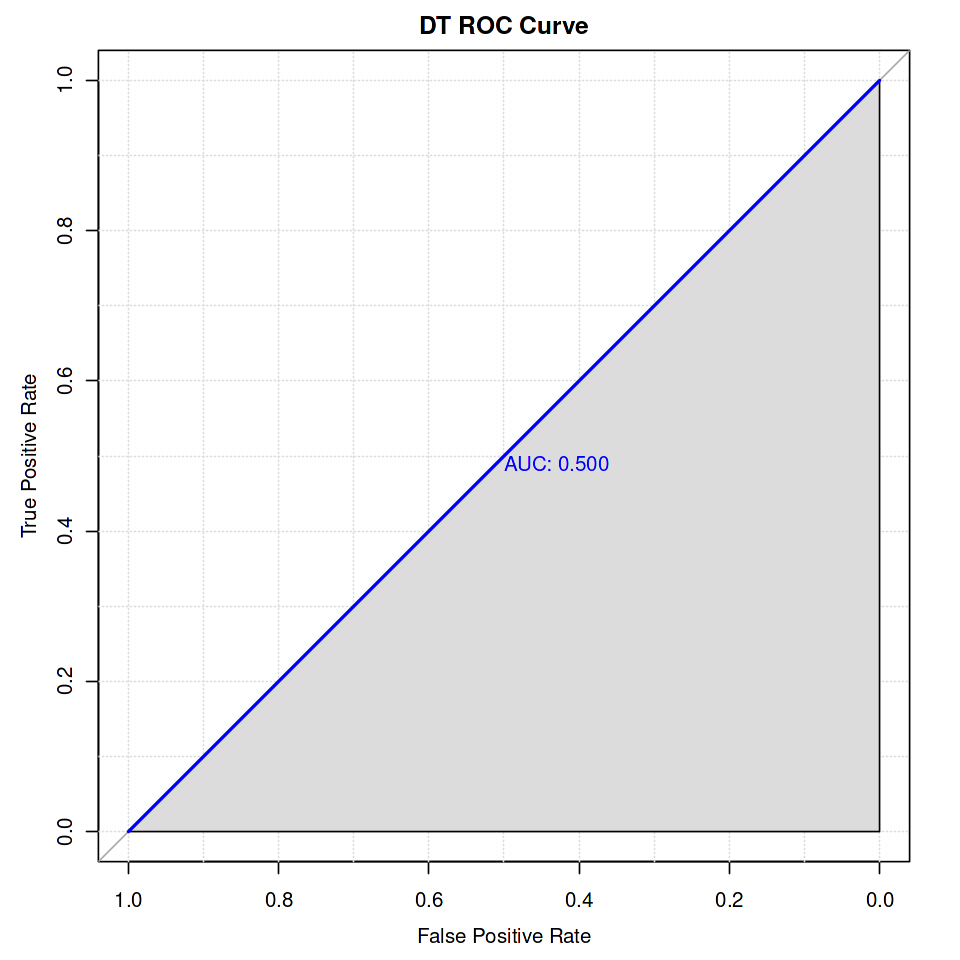

In [70]:
# Set the plot dimensions
options(repr.plot.width = 8, repr.plot.height = 8)  

# Create the ROC curve
DTree_predictions <- as.numeric(DTree_predictions)

DT_roc_obj <- roc(y_test, DTree_predictions)

plot(DT_roc_obj, main = "DT ROC Curve", print.auc = TRUE, auc.polygon = TRUE,
     grid = TRUE, col = "blue", lwd = 2, lty = 1,
     xlab = "False Positive Rate", ylab = "True Positive Rate")

 # Unsupervised Learning

# A. K-Means Clustering

# Part (2) A

# Read Data from CSV file

In [71]:
framingham_data <- read.csv("/kaggle/input/clustering-dataset/framingham.csv")

# Part (2) A-1

# Selecting Age and Male from framingham_data

In [72]:
selected_framingham_data <- framingham_data[, c("age", "male")]

# Show Row count

In [73]:
row_count <- nrow(selected_framingham_data)
row_count

[1] 4240

# Count missing values for each column

In [74]:
missing_Value_count <- colSums(is.na(selected_framingham_data))
missing_Value_count

age male 
   0    0

# Function "Data_scaled"
* this is user defined function whice scale the data 
​
* It Takes 1 parameters Column
​
* then calculate min_Column and max_Column then apply this equation  newX=(X- Min)/(Max - Min)

In [75]:
Data_scaled <- function(Column) {
  min_Column <- min(Column)
  max_Column <- max(Column)
  Column_scaled <- (Column - min_Column) / (max_Column - min_Column)
  return(Column_scaled)
}

# Run Data_scaled using Age Column to standardize it

In [76]:
selected_framingham_data$age <- Data_scaled(selected_framingham_data$age)

In [77]:
head(selected_framingham_data,5)

,age,male
,<dbl>,<int>
1,0.1842105,1
2,0.3684211,0
3,0.4210526,1
4,0.7631579,0
5,0.3684211,0


# Train kmeans clustering with  # Number of clusters (4)

In [78]:
k <- 4  
kmeans_Model <- kmeans(selected_framingham_data, centers = k)

In [79]:
cluster_assignment = kmeans_Model$cluster

table(cluster_assignment)

cluster_assignment
   1    2    3    4 
1040 1103 1317  780 

# Plot the Kmeans  clustering

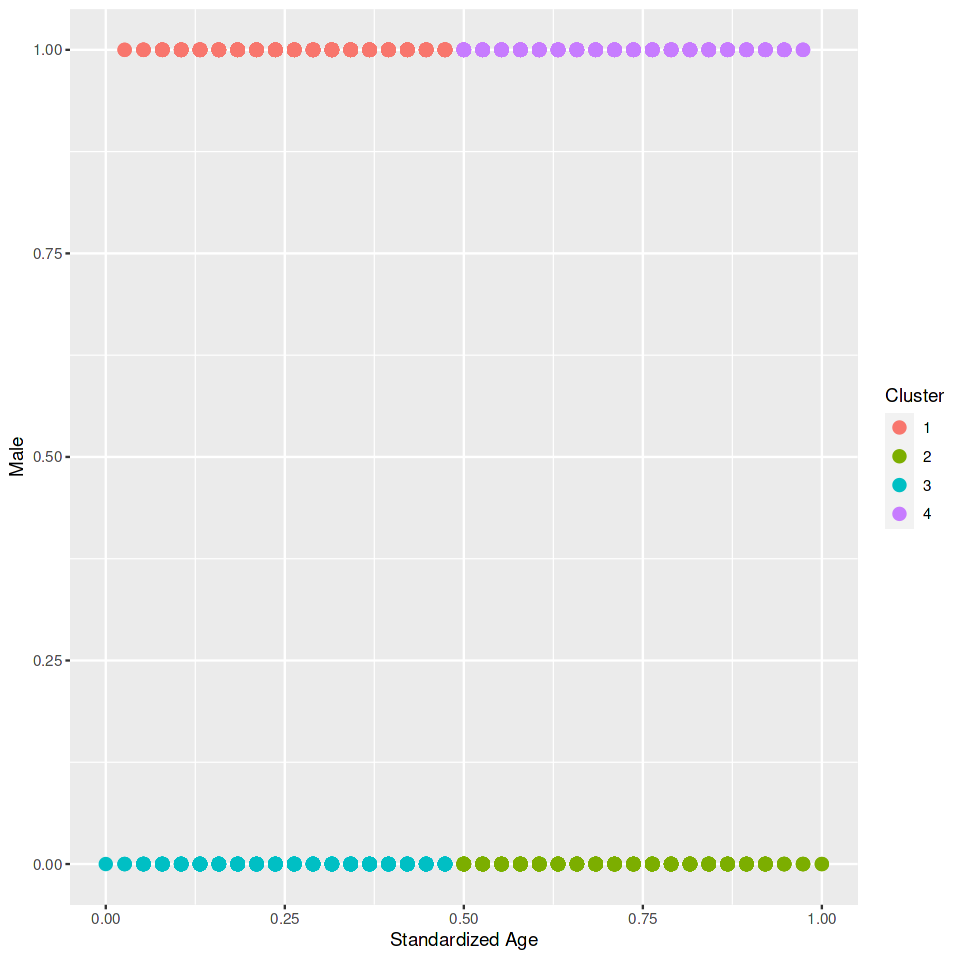

In [80]:
# Set the plot dimensions
options(repr.plot.width = 8, repr.plot.height = 8) 


ggplot(selected_framingham_data, aes(x = age, y = male, color =as.factor(kmeans_Model$cluster))) +
  geom_point(size = 3) +
  labs(x = "Standardized Age", y = "Male", color = "Cluster") +
  scale_color_discrete(name = "Cluster")

# part (2) A-2

In [81]:
 set.seed(123)  

In [82]:
head (selected_framingham_data,5)

,age,male
,<dbl>,<int>
1,0.1842105,1
2,0.3684211,0
3,0.4210526,1
4,0.7631579,0
5,0.3684211,0


# The elbow method to determine the best k 

In [83]:
k_values <- 1:10 
 # Vector to store sum of squared distances
ssd <- numeric(length(k_values)) 

for (i in k_values) {
 
  kmeans_result <- kmeans(selected_framingham_data, centers = i)
  ssd[i] <- kmeans_result$tot.withinss
}


# Plot the elbow curve

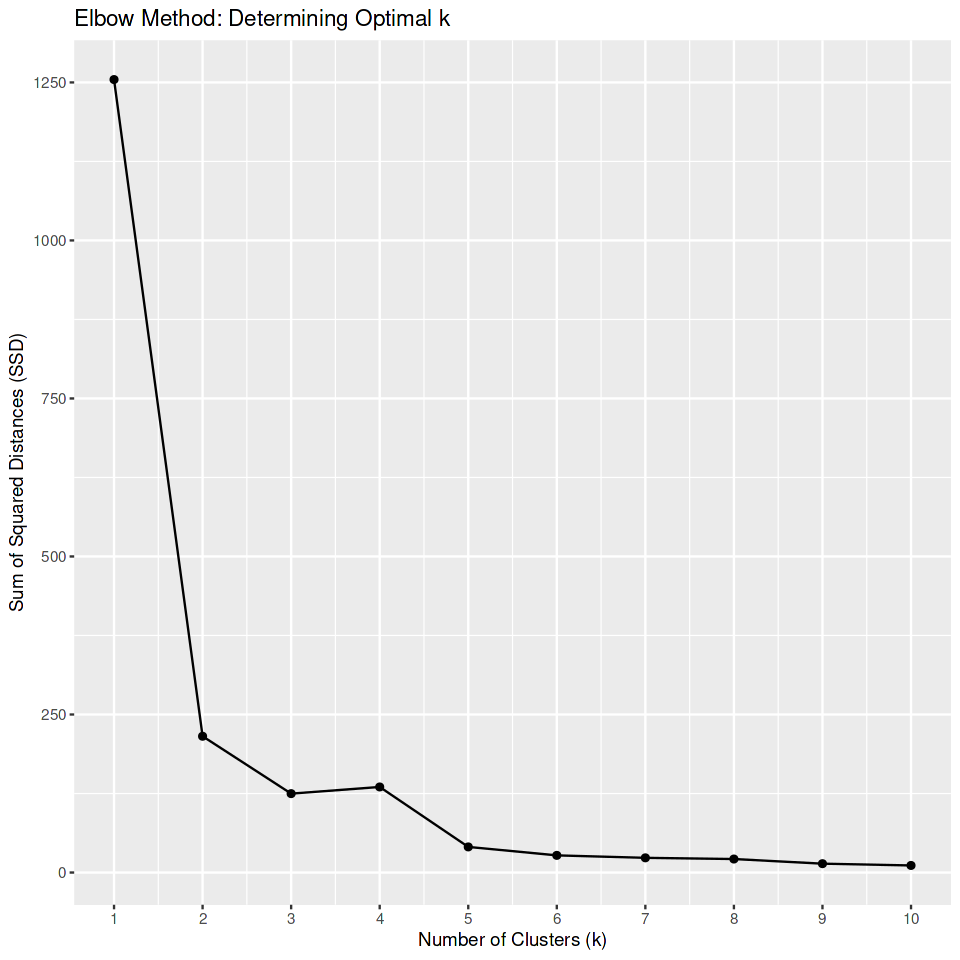

In [84]:
# Set the plot dimensions
options(repr.plot.width = 8, repr.plot.height = 8) 


elbow_data <- data.frame(k = k_values, SSD = ssd)

ggplot(elbow_data, aes(x =k , y = SSD)) +
  geom_point() +
  geom_line() +
  labs(x = "Number of Clusters (k)", y = "Sum of Squared Distances (SSD)") +
  ggtitle("Elbow Method: Determining Optimal k")+
  scale_x_continuous(breaks = k_values)

# part (2) A-3

# Evaluate the quality of the clusters using the Silhouette Coefficient method for # Number of clusters (4)

In [85]:
silhouette <- silhouette(kmeans_Model$cluster, dist(selected_framingham_data))

# Average Silhouette Coefficient
avg_silhouette <- mean(silhouette[, "sil_width"])

cat("Average Silhouette Coefficient:", avg_silhouette, "\n")

Average Silhouette Coefficient: 0.6205278 


# Evaluate the quality of the clusters using the Silhouette Coefficient method for # Number of clusters (2:10) 

In [86]:
 set.seed(123)  

In [87]:
# Specify the range of k values
k_values <- 2:10

silhouette_values <- numeric(length(k_values))

# Calculate Silhouette Coefficient for each value of k
for (i in seq_along(k_values)) {
  k <- k_values[i]
 
  kmeans_result <- kmeans(selected_framingham_data, centers = k)
  cluster_labels <- kmeans_result$cluster
  silhouette_values[i] <- silhouette_avg <- mean(silhouette(cluster_labels, dist(selected_framingham_data))[, "sil_width"])
}


# Plot the Silhouette Coefficient for different k values

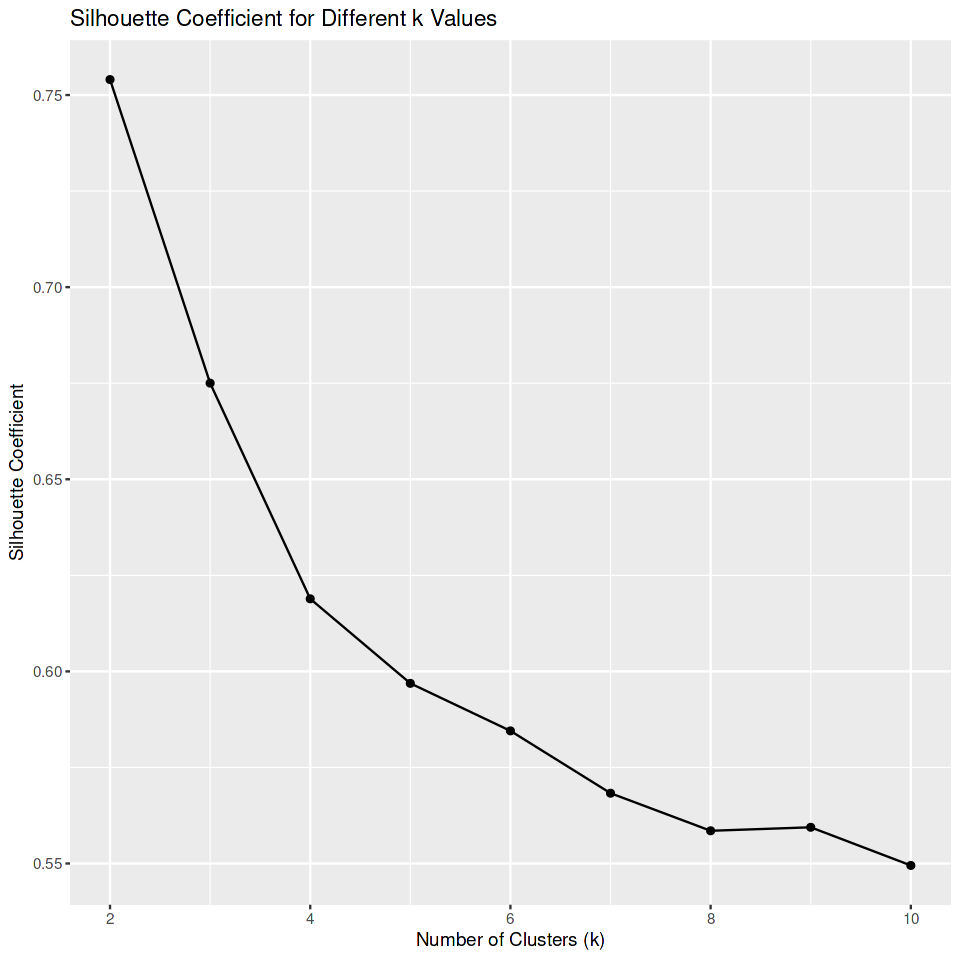

In [88]:
# Set the plot dimensions
options(repr.plot.width = 8, repr.plot.height = 8) 

plot_data <- data.frame(k = k_values, silhouette = silhouette_values)

ggplot(plot_data, aes(x = k, y = silhouette)) +
  geom_line() +
  geom_point() +
  labs(x = "Number of Clusters (k)", y = "Silhouette Coefficient") +
  ggtitle("Silhouette Coefficient for Different k Values")